# goals
- get acquainted with the data
- create visualisation to show data
- analyze the data

data comes from freecodecamp.com

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import numpy as np 

In [28]:
df = pd.read_csv('dailypageview.csv', parse_dates=[0])
df.head()

,date,value
0,2016-05-09,1201
1,2016-05-10,2329
2,2016-05-11,1716
3,2016-05-12,10539
4,2016-05-13,6933


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1304 entries, 0 to 1303
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    1304 non-null   datetime64[ns]
 1   value   1304 non-null   int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 20.5 KB


In [30]:
df.describe()

,value
count,1.304000e+03
mean,6.722068e+04
std,5.933964e+04
min,1.201000e+03
25%,3.575775e+04
50%,5.719750e+04
75%,8.388300e+04
max,1.173655e+06


In [31]:
df.isnull().sum()

date     0
value    0
dtype: int64

<AxesSubplot:xlabel='date', ylabel='value'>

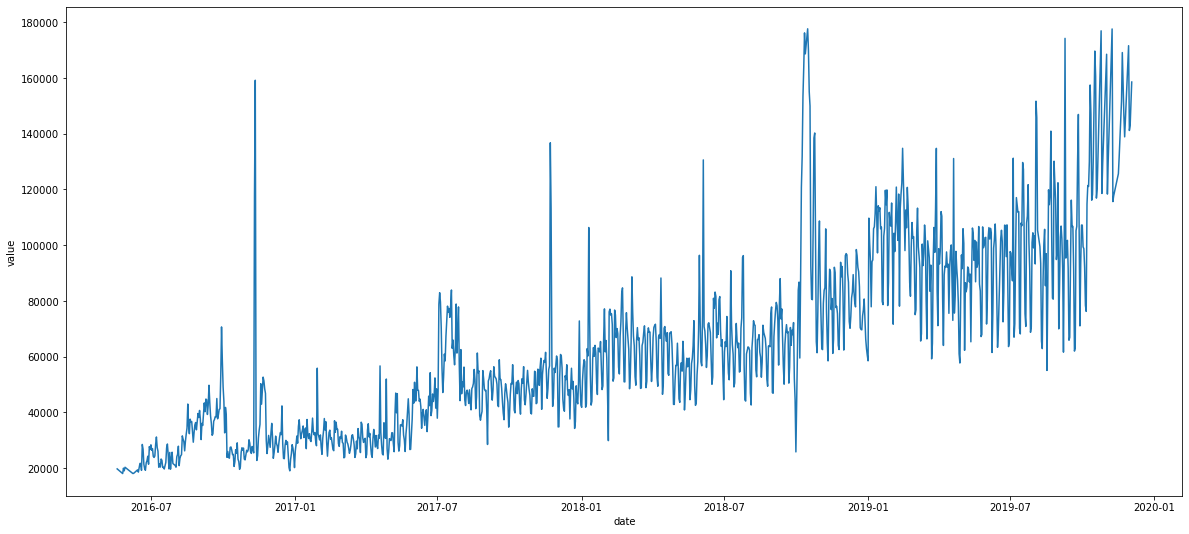

In [35]:
#cleaning outliers
newdf = df.copy()
newdf = newdf[newdf['value'] >= newdf['value'].quantile(0.025)]
newdf = newdf[newdf['value'] <= newdf['value'].quantile(0.975)]
plt.figure(figsize = (20,9))
sns.lineplot(data = newdf, x = 'date',y = 'value')

<AxesSubplot:xlabel='year', ylabel='value'>

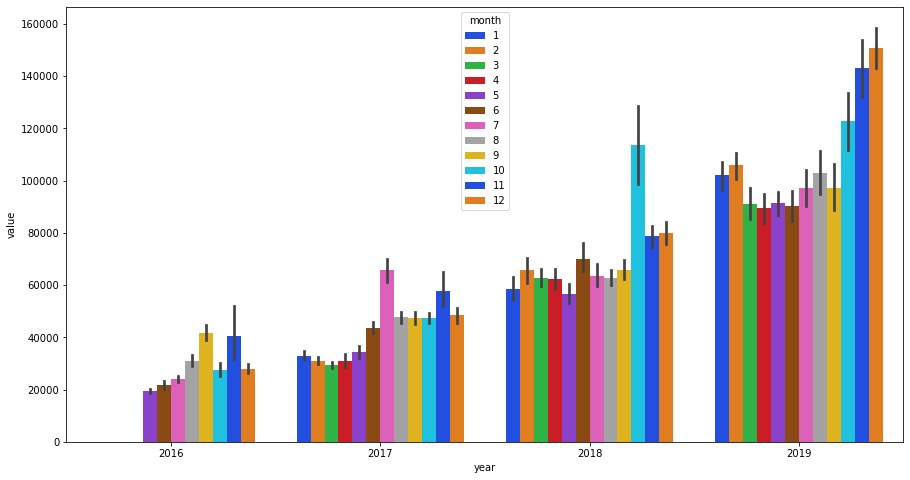

In [68]:
timedf = newdf.copy()
plt.figure(figsize=(15,8))

timedf['year'] = [d.year for d in timedf['date']]
timedf['month'] = [d.month for d in timedf['date']]
sns.barplot(data = timedf, x = 'year', hue = 'month', y = 'value', palette = 'bright')


Text(0.5, 0.92, 'Yearly and Monthly Box plot')

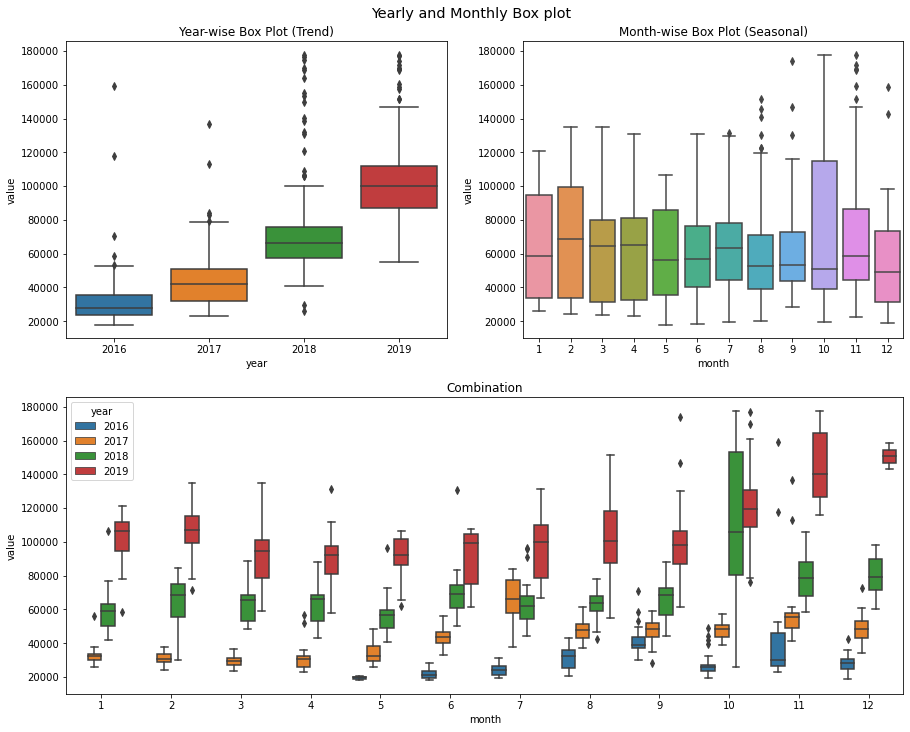

In [89]:
plt.figure(figsize = (15,12))

plt.subplot2grid((2,2),(0,0))
sns.boxplot(data = timedf, x = 'year', y = 'value')
plt.title('Year-wise Box Plot (Trend)')

plt.subplot2grid((2,2),(0,1))
sns.boxplot(data = timedf, x = 'month', y = 'value')
plt.title('Month-wise Box Plot (Seasonal)')

plt.subplot2grid((2,2),(1,0) ,colspan = 2)
sns.boxplot(data = timedf, x = 'month', y = 'value', hue = 'year')
plt.title('Combination')
plt.suptitle('Yearly and Monthly Box plot', y= 0.92, size = 'x-large')
